Saving Tweets.csv to Tweets.csv
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  
Train shape: (21984, 5000), Test shape: (5496, 5000)
Accuracy: 0.6562954876273653
Classification Report: 
              precision    recall  f1-score   support

    negative       0.65      0.59      0.62      1572
     neutral       0.61      0.69     

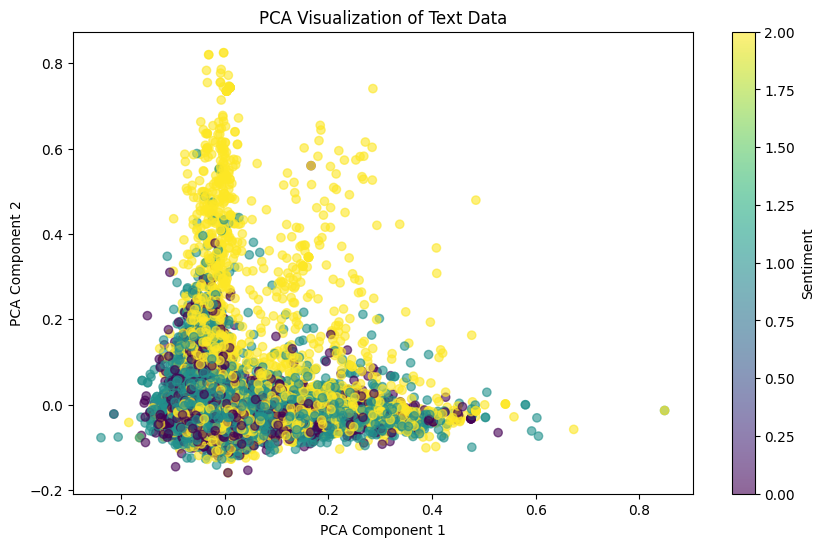

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Read the CSV file
file_path = 'Tweets.csv'  # Make sure the uploaded file name matches
tweets_df = pd.read_csv(file_path)

# Preview the dataset
print(tweets_df.head())

# Drop rows with missing values in 'text' or 'sentiment' columns
tweets_df.dropna(subset=['text', 'sentiment'], inplace=True)

# Encode the sentiment labels
label_encoder = LabelEncoder()
tweets_df['sentiment_encoded'] = label_encoder.fit_transform(tweets_df['sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets_df['text'], tweets_df['sentiment_encoded'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shapes of the transformed data
print(f"Train shape: {X_train_tfidf.shape}, Test shape: {X_test_tfidf.shape}")

# Perform Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_tfidf.toarray(), y_train)

# Predict on the test set
y_pred = lda.predict(X_test_tfidf.toarray())

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print(f'Classification Report: \n{classification_report_result}')

# Visualize using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())

# Create a scatter plot for the PCA components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Sentiment')
plt.title("PCA Visualization of Text Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()
